<a href="https://colab.research.google.com/github/Luqman9191/Diabetes-Prediction/blob/main/Project_1_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step_1 : Importing Libraries that we have used in this project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Step_2 : Load Dataset**

In [ ]:
# Loading the diabetes data set ueing pandas library
df=pd.read_csv('/content/diabetes.csv') 

df.head()  # head show the fist 5 records of the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()  # tail function shows the last five records of the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**Step_3 : Exploratory Data Analysis**

Exploratory data analysis is also known as (EDA) .This technique is used to explore data set for the better understanding of data set.

In [ ]:
df.shape    # shape function shows the total rows and coulmns in the data set

(768, 9)

In [ ]:
df.dtypes  # dytypes show the types of coloumns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.info()  # info shows the information about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()  # describe show the statistical summary of the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Step_4 : Data Cleaning**

In [ ]:
# droping the duplicates values
df=df.drop_duplicates()

In [ ]:
df.shape

(768, 9)

In [ ]:
# checking the null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print('Total no.of zero values in Pregnancies column are ',df[df['Pregnancies']==0].shape[0])

Total no.of zero values in Pregnancies column are  111


In [ ]:
print('Total no.of zero values in Glucose column are ',df[df['Glucose']==0].shape[0])

Total no.of zero values in Glucose column are  5


In [ ]:
print('Total no.of zero values in BloodPressure are ',df[df['BloodPressure']==0].shape[0])

Total no.of zero values in BloodPressure are  35


In [ ]:
print('Total no.of zero values in SkinThickness are ',df[df['SkinThickness']==0].shape[0])

Total no.of zero values in SkinThickness are  227


In [ ]:
print('Total no.of zero values in Insulin are ',df[df['Insulin']==0].shape[0])

Total no.of zero values in Insulin are  374


In [ ]:
print('Total no.of zero values in BMI are ',df[df['BMI']==0].shape[0])

Total no.of zero values in BMI are  11


**Replacing zero values with meain value of the columns**

In [ ]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

In [ ]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [ ]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

In [ ]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [ ]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

In [ ]:
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].mean())

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Step_5 : Data Visualization**

**Countplot**

Count plot is used to show the counts of observations.

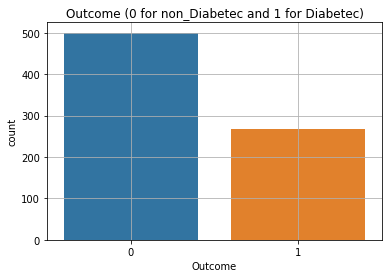

Negative (o) 500
Positive (1) 268


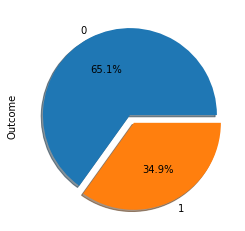

In [ ]:
# countplot
sns.countplot(x='Outcome', data=df)
plt.grid()
plt.title('Outcome (0 for non_Diabetec and 1 for Diabetec)')
plt.show()
df['Outcome'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True )
N,P=df['Outcome'].value_counts()
print('Negative (o)',N)
print('Positive (1)', P)
plt.show()

**Histogram**

Hist is used for numerical data visualization.

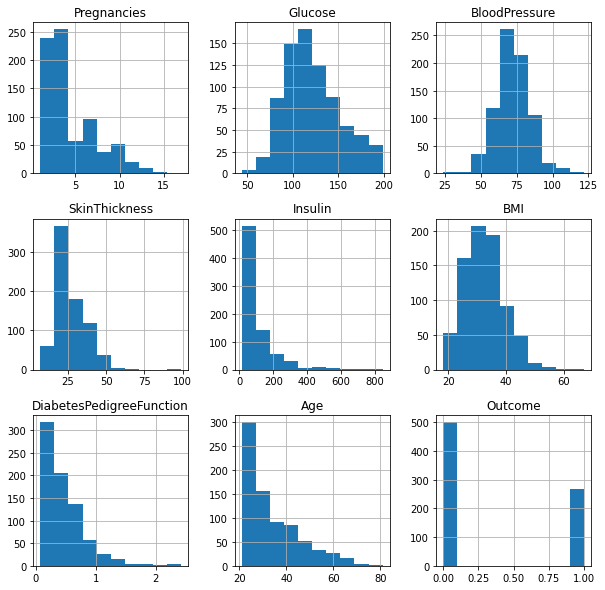

In [ ]:
df.hist(bins=10, figsize=(10,10))
plt.show()

**Pairplot**

Its used to show multiple distribution in the data set

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.pairplot(data=df, hue='Outcome')
plt.show()

**Analysing core relationship between the features**

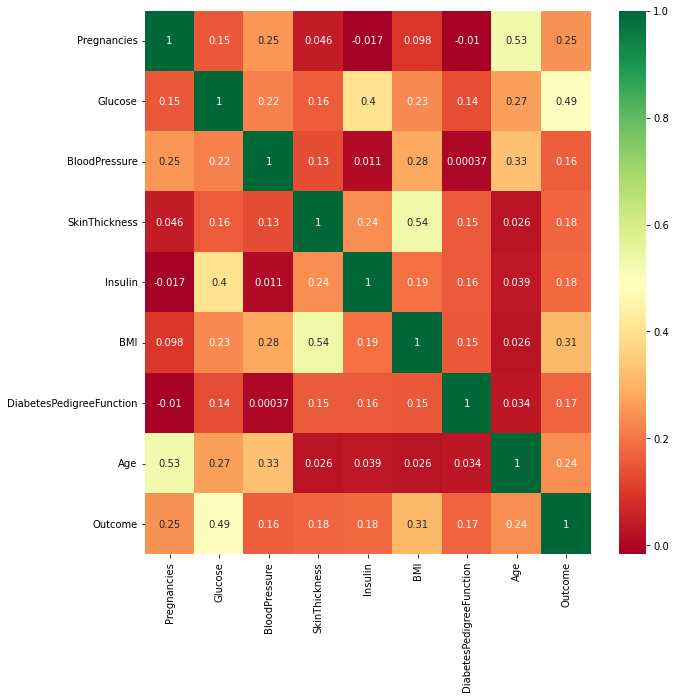

In [ ]:
corrmat=df.corr()
top_core_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_core_features].corr(),annot=True, cmap='RdYlGn')

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**0 --> Non-Diabetec**

**1 -->  Diabetec**

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.859378,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,5.410866,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


**Step_6 : Separating the data and Labels**

In [ ]:
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']


In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0       6.000000    148.0           72.0  ...  33.6                     0.627   50
1       1.000000     85.0           66.0  ...  26.6                     0.351   31
2       8.000000    183.0           64.0  ...  23.3                     0.672   32
3       1.000000     89.0           66.0  ...  28.1                     0.167   21
4       3.845052    137.0           40.0  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763    10.000000    101.0           76.0  ...  32.9                     0.171   63
764     2.000000    122.0           70.0  ...  36.8                     0.340   27
765     5.000000    121.0           72.0  ...  26.2                     0.245   30
766     1.000000    126.0           60.0  ...  30.1                     0.349   47
767     1.000000     93.0           70.0  ...  30.4                     0.315   23

[76

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Step_7 : Data Standardization**

In [ ]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.5362511   0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-1.1403533  -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.20689286  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.20093022 -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-1.1403533   0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-1.1403533  -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [ ]:
X=standardized_data
Y=df['Outcome']

In [ ]:
print(X)

[[ 0.5362511   0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-1.1403533  -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.20689286  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.20093022 -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-1.1403533   0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-1.1403533  -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Step_8 : Train_Test_Split**

In [ ]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


**Step_9 : Training the Model**

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
# Training the suport vector machine classifier
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Step_10 : Model Evaluation**

**Accuracy Score**

In [ ]:
# Accuracy score on the training data
X_train_predict = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)

In [ ]:
print('Training data accuracy score',training_data_accuracy)

Training data accuracy score 0.7817589576547231


In [ ]:
# Accuracy score on the test data
X_test_predict = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predict, Y_test)

In [ ]:
print('Testing data accuracy score', testing_data_accuracy)

Testing data accuracy score 0.7727272727272727


**Step_11 : Checking the model prediction system**

In [ ]:
input_data = (10,115,0,0,0,35.3,0.134,29)
# changing the input data into numpy array
input_data_into_numpy_array = np.asarray(input_data)

# reshape the array for predicting one value 
input_data_reshaped = input_data_into_numpy_array.reshape(1,-1)

# standardized the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[ 1.87753462 -0.21967262 -5.96750591 -2.76431863 -1.27564498  0.41467589
  -1.02042653 -0.36084741]]


In [ ]:
prediction = classifier.predict(std_data)

In [ ]:
print(prediction)

[1]


In [ ]:
if (prediction[0] == 0):
  print('The person is not diabetec')
else:
  print('The person is diabetec')

The person is diabetec
